# Dataset IBM HR Analytics Employee Attrition & Performance
Inspiration paper: "Performance measures and worker productivity"<br>
Source: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

## Description
The dataset we employed is composed of 1470 rows x 35 columns representing employees performance.To build the Belief Network have been used 13 columns.<br>
The attributes represented by each column are: <ul>
<li>Age: an integer variable indicating the age of an employee.
<li>Attrition: a boolen variable indicating whether the employee is exahust or not.
<li>BusinessTravel:a discrete variable indicating the frequency of business trip.
<li>DistanceFromHome: an integer variable indicating how much is distant the employee from the work place.
<li>Education: a discrete variable indicating the studying grade of employee.
<li>JobLevel: a discrete variable indicating the position job grade of employee. 
<li>JobSatisfaction: a discrete variable indicating the grade of satisfaction
<li>MaritalStatus: a discrete variable indicating whether an employee is married or not.
<li>MonthlyIncome:a continuos variable indicating the salary of employee.
<li>OverTime: a boolean variable indicating if an employee does overtime or not.
<li>PerformanceRating: a discrete variable indicating the performance grade of employee.
<li>TotalWorkingYears: an integer variable indicating the experience of employee.
<li>WorkLifeBalance:a discrete variable indicating the ratio between work and life.


In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/dataset.csv')
print(df.columns,len(df.columns))
df.head()


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object') 35


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Preprocessing
### Dropping columns 
The original dataset has been reduced of 22 columns, most of them brought redundant or useless data for our goals. Moreover some features had empty values for some employees. The number of columns in the cleaned dataset is 13

In [6]:

df2 = df.drop(['Gender','EducationField','EmployeeCount','EmployeeNumber','StockOptionLevel','YearsWithCurrManager','TrainingTimesLastYear',
            'HourlyRate','DailyRate','PercentSalaryHike','YearsAtCompany','MonthlyRate','StandardHours',
            'NumCompaniesWorked','Over18','YearsSinceLastPromotion','StandardHours','JobInvolvement','JobRole','RelationshipSatisfaction',
            'Department','YearsInCurrentRole','EnvironmentSatisfaction'], axis= 1)
print(df2.columns,len(df2.columns))




Index(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'OverTime', 'PerformanceRating', 'TotalWorkingYears',
       'WorkLifeBalance'],
      dtype='object') 13


### Discretization
The dataset presents discrete variables with high (or infinite) cardinality domains, like: Age, DistanceFromHome,TotalWorkingYears which would lead to very big and less informative CPDs. In addition, it presents a continuos variable that needs to be discretize.

First of all, we decided to discretize __Age__ so to have 3 different values:<ul>
 <li>Young,
 <li>Middle-Age,
 <li>Senior.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18eb691c50>]],
      dtype=object)

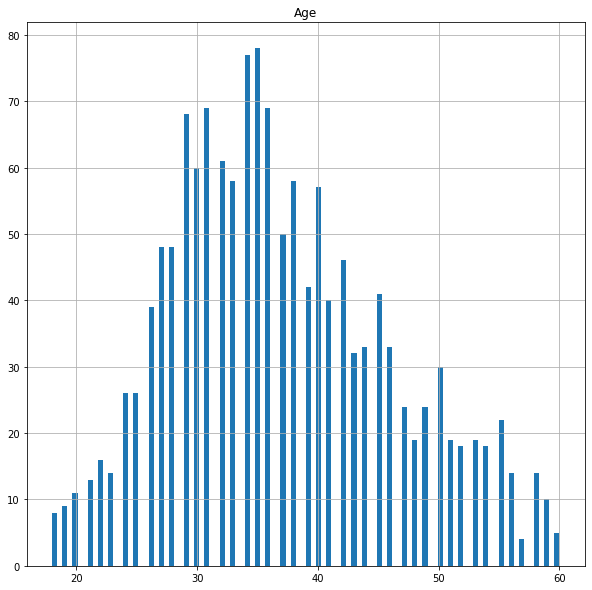

In [7]:
df.hist("Age", bins=100, figsize=(10,10))

In [8]:
def discretize_age(x):
    if x < 30:
        return 'Young'
    if x < 40:
        return 'Middle-age'
    return 'Senior'

df2['Age'] = df['Age'].apply(lambda x: discretize_age(x))
print("New values for age:")
print(np.unique(df2["Age"], return_counts=True)[0])
print(np.unique(df2["Age"], return_counts=True)[1])

New values for age:
['Middle-age' 'Senior' 'Young']
[622 522 326]


We decided to discretize __DistanceFromHome__ using this logic division: <ul>
<li>Short,
<li>Medium,
<li>Long.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18eb478ad0>]],
      dtype=object)

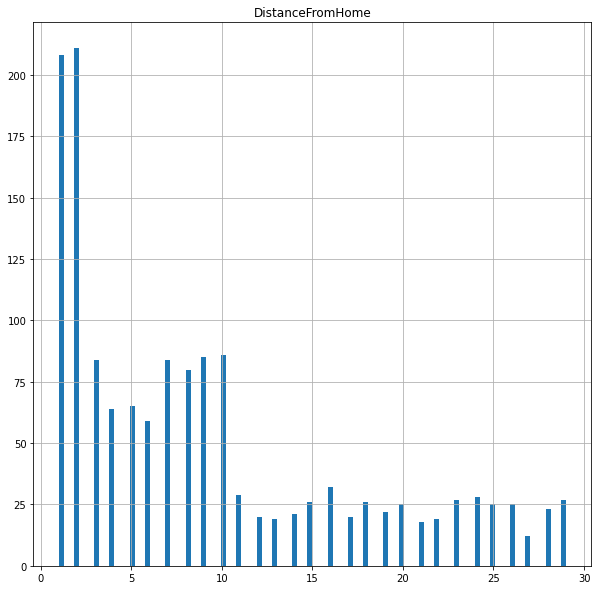

In [9]:
df.hist("DistanceFromHome", bins=100, figsize=(10,10))

In [10]:
def discretize_distance(x):
    if x < 10:
        return 'Short'
    if x < 20:
        return 'Medium'
    return 'Long'
    

df2['DistanceFromHome'] = df['DistanceFromHome'].apply(lambda x: discretize_distance(x))
print("New values for DistanceFromHome:")
print(np.unique(df2["DistanceFromHome"], return_counts=True)[0])
print(np.unique(df2["DistanceFromHome"], return_counts=True)[1])

New values for DistanceFromHome:
['Long' 'Medium' 'Short']
[229 301 940]


Then, we decided to discretize __TotalWorkingYears__, the division is based on logic and distribution of data because if we observe the graph we notice that most of data are in the inteval [0;10]. The division used is:<ul>
<li>Novice,
<li>Beginner,
<li>Competent,
<li>Proficient,
<li>Expert.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18eae30790>]],
      dtype=object)

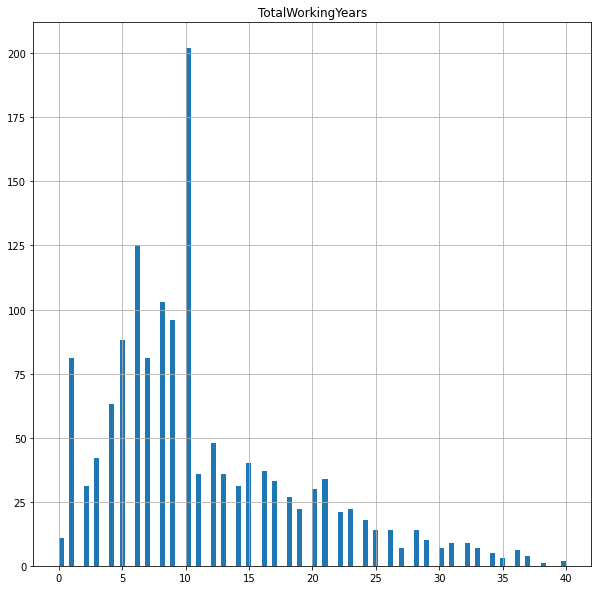

In [11]:
df.hist("TotalWorkingYears", bins=100, figsize=(10,10))

In [12]:
def discretize_experience(x):
    if x < 3:
        return 'Novice'
    if x < 7:
        return 'Beginner'
    if x < 15:
        return 'Competent'
    if x < 20:
        return 'Proficient'
    return 'Expert'
    

df2['TotalWorkingYears'] = df['TotalWorkingYears'].apply(lambda x: discretize_experience(x))
print("New values for DistanceFromHome:")
print(np.unique(df2["TotalWorkingYears"], return_counts=True)[0])
print(np.unique(df2["TotalWorkingYears"], return_counts=True)[1])

New values for DistanceFromHome:
['Beginner' 'Competent' 'Expert' 'Novice' 'Proficient']
[318 633 237 123 159]


The next variable to discretize is __Monthlyincome__. We chose to divide the range into three values:<ul>
<li>Lower,
<li>On_average,
<li>higher. 
<br>
Since there isn't a trivial way to set the bounds for each bucket, we chose to apply the equi-frequency discretization function based on quantiles, provided by pandas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18eaccca10>]],
      dtype=object)

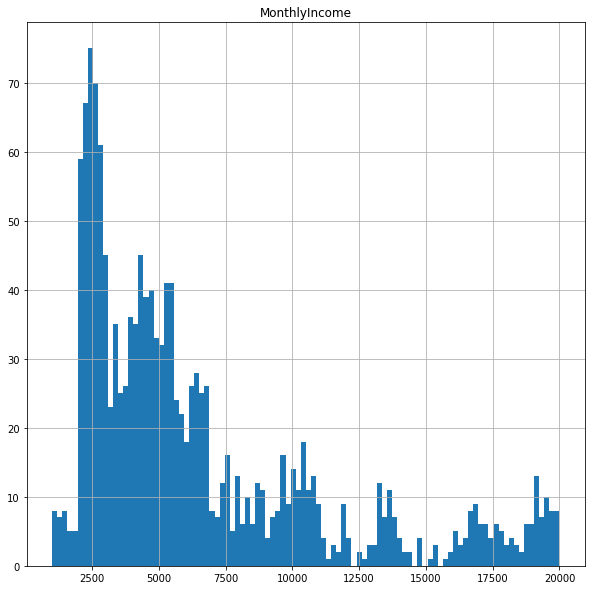

In [13]:
df.hist("MonthlyIncome", bins=100, figsize=(10,10))

In [14]:
df2["MonthlyIncome"] =  pd.qcut(df['MonthlyIncome'], 3, labels=["Lower", "On_average", "Higher"])
print("New unique values for Total_income:")
print(np.unique(df2["MonthlyIncome"], return_counts=True)[0])
print(np.unique(df2["MonthlyIncome"], return_counts=True)[1])

New unique values for Total_income:
['Higher' 'Lower' 'On_average']
[490 490 490]


## Mapping
In the following columns the values in the range {1..4} have been mapped into string values already given by the specification of the dataset, whereas for the columns 'JobLevel' the corresponding values have been mapped by us trying out to be the as more general as possibile. The colum  'Business travel' has been just renamed.

In [15]:
map_ed =  {1: 'Below_college',2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
map_sat = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very_high'}
map_rat = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
map_life = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
level = {1: 'Technician', 2: 'Rappresentative', 3: 'Director', 4: 'Manager', 5: 'Manager'}
travel  = {'Non-Travel': 'Non-Travel', 'Travel_Frequently':'Frequently', 'Travel_Rarely':'Rarely'}

def mapping(x,map):
    if x in map.keys():
        return map[x]
    raise Exception

df2['Education'] = df['Education'].apply(lambda x: mapping(x,map_ed))
df2['JobSatisfaction'] = df['JobSatisfaction'].apply(lambda x: mapping(x,map_sat))
df2['PerformanceRating'] = df['PerformanceRating'].apply(lambda x: mapping(x,map_rat))
df2['WorkLifeBalance'] = df['WorkLifeBalance'].apply(lambda x: mapping(x,map_life))
df2['JobLevel'] = df['JobLevel'].apply(lambda x: mapping(x,level))
df2['BusinessTravel'] = df['BusinessTravel'].apply(lambda x: mapping(x,travel))

In [16]:
print('None value : ',df2.isnull().sum().sum()) 

None value :  0


In [17]:
df2.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PerformanceRating,TotalWorkingYears,WorkLifeBalance
0,Senior,Yes,Rarely,Short,College,Rappresentative,Very_high,Single,On_average,Yes,Excellent,Competent,Bad
1,Senior,No,Frequently,Short,Below_college,Rappresentative,Medium,Married,On_average,No,Outstanding,Competent,Better
2,Middle-age,Yes,Rarely,Short,College,Technician,High,Single,Lower,Yes,Excellent,Competent,Better
3,Middle-age,No,Frequently,Short,Master,Technician,High,Married,Lower,Yes,Excellent,Competent,Better
4,Young,No,Rarely,Short,Below_college,Technician,Medium,Married,Lower,No,Excellent,Beginner,Better


In [ ]:
df2.to_csv('data/cleaning_dataset.csv', index=False)